# STUDENT NAME : SHIVAANI KATRAGADDA

# STUDEN NUMBER : R00183214

# COURSE : MSc.DATA SCIENCE & ANALYTICS

# MODULE : APPLIED MACHINE LEARNING

# MODULE CODE : COMP9060

# ASSIGNMENT NUMBER : 3

# PROFESSOR : DR. HAITHEM AFLI

# DATE : 21-05-2020

# DAY : THURSDAY

In this assignment, I was given a dataset called the  Dog Vs Cats dataset. It is an open-source dataset that is available at the website https://www.kaggle.com/c/dogs-vs-cats/data. The dataset is a collection of images. There are only two types of images in the dataset that is cat and dog. The dataset is comprised of 25,000 images of dogs and cats. This is a binary classification problem. The images have a significant variation in the pose. The objective of this assessment is to build a machine learning Cat/Dog image classifier. Therefore I have to implement a system to classify whether images contain either a dog or a cat.

I have used a selection of images (1000 for the train and 100 for the test) for initial development in the file (project3_files.zip) for this assignment. The project3_files.zip folder contains two file train and test. The training file contains 1000 images, this data is used for training the data and the test file contains 100 images, this data is used for testing the data.

Initially, I have imported and installed all the required packages for the task to perform.

In [ ]:
#INSTALLING OPENCV
#I have already installed that in my computer so I am making that command as comment here.
#to use cv2 we need opencv
#pip install opencv-python

# PART A: PRE-PROCESSING PHASE

In [1]:
#lOADING ALL THE REQUIRED PACKAGES
from __future__ import print_function
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
from os import listdir
import cv2 as cv
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import roc_auc_score


I have intiliazed two empty lists they are loaded_images and categories.In loaded_images i will be importing all the given images in the train dataset and categories have the names of dog and cat. I splitted the data and assigned that if the category is dog I assigned value 1 and if it is cat I assigned value 0.
I read the images by using cv.imread,resized the data by using cv.resize(), normalised the data by using cv.normalise() function.
And then flattened the images using flatten() function.
After reading the images and categories I created a dataframe by using pandas. I assigned loaded_images to the variable filename and categories to category and the name of the dataframe is cat_dog

In [2]:
#for loading all image in a list
loaded_images=[]
##for loading all categories in a list
categories = []
##for  loading all normalize image
nor_images=[]
filenames = os.listdir("F:/AML3/Project3_files/data/train")
for filename in listdir("F:/AML3/Project3_files/data/train"):
   
   
    category = filename.split('.')[0]
    #if the category is dog I am assigning value 1 else 0 i.e for cat
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

    img_data= cv.imread("F:/AML3/Project3_files/data/train/"+filename)
    ##resizing the images by 350*350
    resizing = cv.resize(img_data,(350, 350),interpolation = cv.INTER_AREA)
    #normalizing the images
    normal_image = cv.normalize(resizing, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    #appending the images
    nor_images.append(normal_image)
    #flattening the images
    resizing1=normal_image.flatten()
    #appending the flatten images
    loaded_images.append(resizing1)
    #printing the data
    #print('>loaded %s %s' %(filename,img_data.shape))
    #print('resize dim:', resizing.shape)
    #print('Resized Dimensions : ',resizing1.shape)


In [3]:
#pandas dataframe for files and categories
cat_dog = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
#printing the dataframe
cat_dog

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0
...,...,...
997,dog.95.jpg,1
998,dog.96.jpg,1
999,dog.97.jpg,1
1000,dog.98.jpg,1


Here I am converting the loaded_images and categories in to numpy arrays, assigning the loaded_images in to variable X and categories into variable y 

In [4]:
#converting images in to numpy array
X = np.array(loaded_images)

#converting categories in to numpy array
y=np.array(categories)


I used PCA() fuction which is available in sklearn.decomposition.For the n_components I have assigned the value 25.


In [5]:
#performining PCA
from sklearn.decomposition import PCA
#given n_components=25
pca = PCA(n_components = 25)
#fitting the pca for images
pca.fit(X)
#transforming the data
reduced=pca.transform(X)
#shape of reduced data
reduced.shape

(1002, 25)

In [6]:
#printing the reduced data
reduced

array([[-26.834148  ,  72.451836  , 121.772995  , ...,  13.873478  ,
        -19.63977   , -20.259691  ],
       [102.69871   ,  27.354412  ,  23.223078  , ...,   0.7799087 ,
          7.492433  ,  -6.1978164 ],
       [ 27.684584  , -20.024143  ,  24.285273  , ..., -24.083487  ,
         -7.261979  ,  -7.931734  ],
       ...,
       [-55.0678    ,   4.517707  , -36.430473  , ...,  -3.7398067 ,
         21.925724  , -11.747543  ],
       [ 23.187721  ,  -9.618494  ,  -2.8310485 , ...,  -8.226206  ,
        -11.013342  , -14.484751  ],
       [ 66.7822    , -21.320372  , -13.313135  , ...,   0.44607896,
          6.1080737 ,  10.261925  ]], dtype=float32)

In [7]:
#This is the first stage pre_processing

# PART B: TRAINING PHASE

## SPLITTING THE DATA

I splitted the data which is obtained after dimension reduction.I will be splitting the data in to the ratio 80% for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(214)
# create training and testing 
X_train, X_test, y_train, y_test = train_test_split(reduced, y, test_size=0.2, random_state=214)
#printing shape of X_train.shape, y_train.shape
print(X_train.shape, y_train.shape)

#printing shape of X_test.shape, y_test.shape
print (X_test.shape, y_test.shape)


(801, 25) (801,)
(201, 25) (201,)


## BUILDING THE MODELS

Buildig the models and cross validating it by using cv=5 and scoring='accuracy'

# 1.LOGISTIC REGRESSION

In [9]:
from sklearn.linear_model import LogisticRegression
np.random.seed(214)

#defining the classifier 
Logistic =LogisticRegression()
#fitting the model

Logistic.fit(X_train, y_train)
#generating prediction

y_pred = Logistic.predict(X_test)
#printing confusion matrix,classification report 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[57 56]
 [35 53]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       113
           1       0.49      0.60      0.54        88

    accuracy                           0.55       201
   macro avg       0.55      0.55      0.55       201
weighted avg       0.56      0.55      0.55       201

Confusion Matrix: 
 [[57 56]
 [35 53]]



In [10]:
from sklearn.model_selection import cross_val_score

# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(Logistic, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.55721393 0.54726368 0.595      0.495      0.54      ]
0.5468955223880597


# 2.Navie Bayesians Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB 
#defining the classifier 
GaussianNB =GaussianNB()
#fitting the model

GaussianNB.fit(X_train, y_train)
#generating prediction

y_pred = GaussianNB.predict(X_test)
#printing confusion matrix,classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[60 53]
 [25 63]]
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       113
           1       0.54      0.72      0.62        88

    accuracy                           0.61       201
   macro avg       0.62      0.62      0.61       201
weighted avg       0.63      0.61      0.61       201

Confusion Matrix: 
 [[60 53]
 [25 63]]



In [12]:

from sklearn.model_selection import cross_val_score

# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(GaussianNB , reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.54726368 0.58706468 0.62       0.595      0.65      ]
0.5998656716417909


# 3.KNeighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#defining the classifier 
knn = KNeighborsClassifier(n_neighbors=5)
#fitting the model

knn.fit(X_train, y_train)
#generating prediction

y_pred = knn.predict(X_test)
#printing confusion matrix,classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()

[[53 60]
 [26 62]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       113
           1       0.51      0.70      0.59        88

    accuracy                           0.57       201
   macro avg       0.59      0.59      0.57       201
weighted avg       0.60      0.57      0.57       201

Confusion Matrix: 
 [[53 60]
 [26 62]]



In [14]:
from sklearn.model_selection import cross_val_score

# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.5721393  0.55223881 0.55       0.65       0.63      ]
0.5908756218905473


# 4.Support Vector Machines

In [15]:
from sklearn.svm import SVC
#defining the classifier 
SVC =SVC()
#fitting the model

SVC.fit(X_train, y_train)
#generating prediction

y_pred = SVC.predict(X_test)
#printing confusion matrix,classification report 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[60 53]
 [28 60]]
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       113
           1       0.53      0.68      0.60        88

    accuracy                           0.60       201
   macro avg       0.61      0.61      0.60       201
weighted avg       0.62      0.60      0.60       201

Confusion Matrix: 
 [[60 53]
 [28 60]]



In [16]:
from sklearn.model_selection import cross_val_score

# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(SVC, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.58208955 0.57711443 0.59       0.63       0.615     ]
0.5988407960199005


# 5.Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
#defining the classifier 
decisiontree = DecisionTreeClassifier()
#fitting the model

decisiontree.fit(X_train, y_train)
#generating prediction

y_pred = decisiontree.predict(X_test)
#printing confusion matrix,classification report 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[57 56]
 [31 57]]
              precision    recall  f1-score   support

           0       0.65      0.50      0.57       113
           1       0.50      0.65      0.57        88

    accuracy                           0.57       201
   macro avg       0.58      0.58      0.57       201
weighted avg       0.58      0.57      0.57       201

Confusion Matrix: 
 [[57 56]
 [31 57]]



In [18]:
from sklearn.model_selection import cross_val_score

# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(decisiontree, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.53233831 0.58706468 0.545      0.535      0.535     ]
0.5468805970149254


# 6.Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier


#defining the classifier 
random_forest =RandomForestClassifier()
#fitting the model

random_forest.fit(X_train, y_train)
#generating prediction

y_pred = random_forest.predict(X_test)
#printing confusion matrix,classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[64 49]
 [27 61]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       113
           1       0.55      0.69      0.62        88

    accuracy                           0.62       201
   macro avg       0.63      0.63      0.62       201
weighted avg       0.64      0.62      0.62       201

Confusion Matrix: 
 [[64 49]
 [27 61]]



In [20]:
from sklearn.model_selection import cross_val_score


# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(random_forest, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.55721393 0.58208955 0.62       0.595      0.64      ]
0.5988606965174129


# 7.SGD Classifier

In [21]:
from sklearn.linear_model import SGDClassifier


#defining the classifier 
SGDClassifier =SGDClassifier()
#fitting the model

SGDClassifier.fit(X_train, y_train)
#generating prediction

y_pred = SGDClassifier.predict(X_test)
#printing confusion matrix,classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[58 55]
 [42 46]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       113
           1       0.46      0.52      0.49        88

    accuracy                           0.52       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.53      0.52      0.52       201

Confusion Matrix: 
 [[58 55]
 [42 46]]



In [22]:
from sklearn.model_selection import cross_val_score


# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(SGDClassifier, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.52736318 0.51243781 0.52       0.535      0.515     ]
0.5219601990049751


# 8.Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier


#defining the classifier 
GradientBoostingClassifier =GradientBoostingClassifier()
#fitting the model

GradientBoostingClassifier.fit(X_train, y_train)
#generating prediction

y_pred = GradientBoostingClassifier.predict(X_test)
#printing confusion matrix,classification report 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[55 58]
 [33 55]]
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       113
           1       0.49      0.62      0.55        88

    accuracy                           0.55       201
   macro avg       0.56      0.56      0.55       201
weighted avg       0.56      0.55      0.55       201

Confusion Matrix: 
 [[55 58]
 [33 55]]



In [24]:
from sklearn.model_selection import cross_val_score


# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(GradientBoostingClassifier, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.53731343 0.58706468 0.6        0.575      0.61      ]
0.5818756218905473


# 9.AdaBoost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
#defining the classifier 


AdaBoostClassifier =AdaBoostClassifier()
#fitting the model
AdaBoostClassifier.fit(X_train, y_train)
#generating prediction

y_pred = AdaBoostClassifier.predict(X_test)
#printing confusion matrix,classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()


[[64 49]
 [39 49]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       113
           1       0.50      0.56      0.53        88

    accuracy                           0.56       201
   macro avg       0.56      0.56      0.56       201
weighted avg       0.57      0.56      0.56       201

Confusion Matrix: 
 [[64 49]
 [39 49]]



In [26]:
from sklearn.model_selection import cross_val_score


# reduced,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(AdaBoostClassifier, reduced, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())


[0.56218905 0.60696517 0.605      0.555      0.565     ]
0.5788308457711443


# MODEL SELECTION

Considering the top model by looking into all the models accuracy

In [27]:
#packages for building the models
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [28]:


#building the more number of models to select one best model
lr = LogisticRegression()
nb = GaussianNB()
knc = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
sgd = SGDClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()


#defining all models
models = {'Logistic Regression':lr, 'Naive Bayes classifier':nb, 'k-nearest neighbors':knc, 
          'Support Vector Machine':svc, 'Decision Tree Classifier':dtc, 
          'Random Forest Classifier':rfc,'Stochastic Gradient Descent':sgd, 'Gradient Boosting Classifier':gbc, 'AdaBoost Classifier':abc}

In [29]:


#function for fitting and prediction for all the models
def eval_model(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
    return test_accuracy, conf_matrix

In [30]:
np.random.seed(214)

#test accuracies and confusion matrix for the models
test_accuracies = []
confusion_matrices = []
for name, model in models.items():
    test_acc, conf_matrix = eval_model(model) 
    test_accuracies.append(test_acc)
    confusion_matrices.append(conf_matrix)
    print(f'{name} ---> Test accuracy - {test_acc*100:.2f}%')
    

Logistic Regression ---> Test accuracy - 54.73%
Naive Bayes classifier ---> Test accuracy - 61.19%
k-nearest neighbors ---> Test accuracy - 57.21%
Support Vector Machine ---> Test accuracy - 59.70%
Decision Tree Classifier ---> Test accuracy - 54.73%
Random Forest Classifier ---> Test accuracy - 63.18%
Stochastic Gradient Descent ---> Test accuracy - 53.73%
Gradient Boosting Classifier ---> Test accuracy - 55.22%
AdaBoost Classifier ---> Test accuracy - 56.22%


In [31]:
#Building one frame for all test accuracies
results = pd.DataFrame(test_accuracies, index=list(models.keys()), columns=['test_acc'])
results

,test_acc
Logistic Regression,0.547264
Naive Bayes classifier,0.611940
k-nearest neighbors,0.572139
Support Vector Machine,0.597015
Decision Tree Classifier,0.547264
Random Forest Classifier,0.631841
Stochastic Gradient Descent,0.537313
Gradient Boosting Classifier,0.552239
AdaBoost Classifier,0.562189


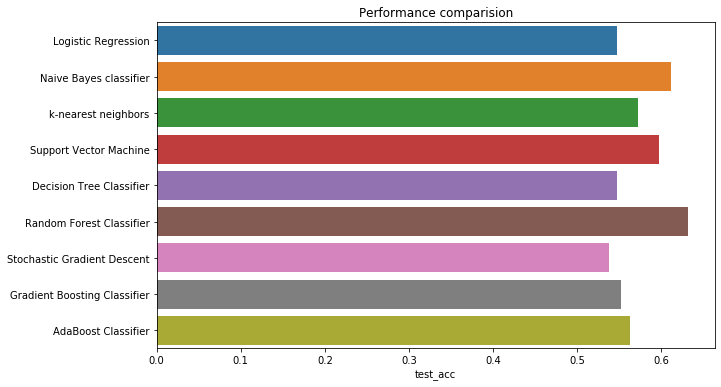

In [32]:
import seaborn as sns

#Barplot for all the model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x ='test_acc', y=results.index, data=results)
plt.title('Performance comparision')
plt.show()

In [33]:
import matplotlib.pyplot as plt

#plotting confusion matrix for all the models
def plot_confusion_matrices(models, confusion_matrices):
    fig, axs = plt.subplots(2,4, figsize=(10,5)) 

    m = 0
    for i, ax_r in enumerate(axs):
        for j, ax in enumerate(ax_r):
            sns.heatmap(confusion_matrices[m], annot=True, cbar=False, cmap='Blues', fmt='g', ax = ax)
            ax.set_xlabel('Predicted label')
            ax.set_ylabel('True label')
            ax.set_title(f'{list(models.keys())[m]}', fontsize=12, fontweight='bold')
            m += 1

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()

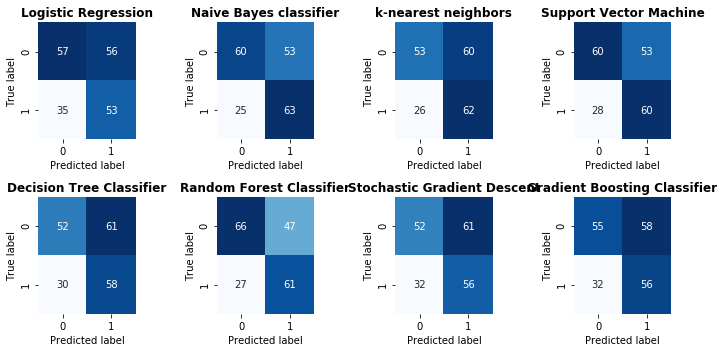

In [34]:
#plotting confusion matrix of all models
plot_confusion_matrices(models, confusion_matrices)

# Among all the models RANDOM FOREST Classifier have highest accuray


# PART C: OPTIMIZATION PHASE

Here I consider RANDOM FOREST for optimization of hyperparameters 
Hyper-parameter tuning refers to the automated optimization of an ML model's hyper-parameters. Hyper-parameters are all the parameters of a model that are not modified during the learning process and are used either to configure the model or the algorithm used to lower the cost function.

I am tuning the model by using GridSearchCV

I am initializing the parameters grid first,created random forest classifier model and setted up the grid search meta_estimator.
Later training the grid search meta-estimator. After that taking the parameters and placing those parameters in the model and now tunning the  model. we can use the model to predict the data .so for predicting I applied X_test.
Therefore the the model is optimized.

In [35]:
#showing the parameters of the random_forest model
random_forest.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
#hyperparameter optimization
#APPLYING TUNING FOR THE RANDOM FOREST USING GRIDSEARCHCV
rf_grid = RandomForestClassifier(random_state=2) # creates a new estimator




In [37]:
# Create the parameter grid 
rf_param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}



In [38]:
# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
rf_grid_search = GridSearchCV(estimator=rf_grid, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)



In [39]:
#training the model
rf_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   52.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [40]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [41]:

#optimising the model
from sklearn.ensemble import RandomForestClassifier
#defining classifier with the best parameters
random_forest1 =RandomForestClassifier(criterion= 'entropy',
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 100)
#fitting the model
random_forest1.fit(X_train, y_train)
#generating prediction
y_pred = random_forest1.predict(X_test)

#printing confusion matrix,classification report and accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print()
print('Accuracy: ', accuracy_score(y_test,y_pred))


[[69 44]
 [28 60]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       113
           1       0.58      0.68      0.62        88

    accuracy                           0.64       201
   macro avg       0.64      0.65      0.64       201
weighted avg       0.65      0.64      0.64       201

Confusion Matrix: 
 [[69 44]
 [28 60]]

Accuracy:  0.6417910447761194


In [42]:
# generating  predictions 
rf_prediction = random_forest1.predict(X_test)
print(rf_prediction)



[1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0]


In [43]:
#classification report
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       113
           1       0.58      0.68      0.62        88

    accuracy                           0.64       201
   macro avg       0.64      0.65      0.64       201
weighted avg       0.65      0.64      0.64       201



In [44]:
#confusin matrix
print('Confusion Matrix: \n', confusion_matrix(y_test,rf_prediction))


Confusion Matrix: 
 [[69 44]
 [28 60]]


In [45]:
#printing accuracy
print('Accuracy: ', accuracy_score(y_test,rf_prediction))

Accuracy:  0.6417910447761194


In [46]:
#printing the roc_accuracy_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_prediction)

0.6462188254223652

The accuracy for the tunned random forest model is 64.62% 

The accuracy for the random forest model before tunning is 63.18%

Here I followed the same procedure that I used for loading the train data.
I have intiliazed two empty lists they are loaded_images and categories.In loaded_images i will be importing all the given images in the test dataset and categories have the names of dog and cat. I splitted the data and assigned that if the category is dog I assigned value 1 and if it is cat I assigned value 0. I read the images by using cv.imread,resized the data by using cv.resize(), normalised the data by using cv.normalise() function. And then flattened the images using flatten() function. After reading the images and categories I created a dataframe by using pandas. I assigned loaded_images to the variable filename and categories to category and the name of the dataframe is cat_dog_test



In [47]:
#LOADING TEST DATA

In [55]:
# for loading all image in a list
loaded_images=[]
# for loading all categories in a list
categories = []
# for loading all normalize images
nor_image=[]
filenames = os.listdir("F:/AML3/Project3_files/data/test")
for filename in listdir("F:/AML3/Project3_files/data/test"):
   
   
    category = filename.split('.')[0]
    
    #assigning labels if it id dog i assigned label 1 else 0  i.e for cat
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)


     #loading the images
    img_data= cv.imread("F:/AML3/Project3_files/data/test/"+filename)
    
    #resizing the images by 350*350
    res = cv.resize(img_data,(350, 350),interpolation = cv.INTER_AREA)
    
    #normalizing the images
    norm_image = cv.normalize(res, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    
    #appending the norm_images
    nor_image.append(norm_image)
    
    #flattening the images
    res2=norm_image.flatten()
    
    #appending the images   
    loaded_images.append(res2)
   
    print('>loaded %s %s' %(filename,img_data.shape))
    print('resize dim:', res.shape)
    print('Resized Dimensions : ',res2.shape)


>loaded 1.jpg (499, 381, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 10.jpg (374, 500, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 100.jpg (343, 499, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 11.jpg (370, 278, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 12.jpg (465, 315, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 13.jpg (376, 500, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 14.jpg (293, 500, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 15.jpg (499, 377, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 16.jpg (374, 500, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 17.jpg (399, 228, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 18.jpg (459, 499, 3)
resize dim: (350, 350, 3)
Resized Dimensions :  (367500,)
>loaded 19.jpg (272, 328, 3)
resize dim: (3

In [49]:
# creating pandas dataframe for files and categories
cat_dog_test = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#printing the dataframe
cat_dog_test

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,11.jpg,0
4,12.jpg,0
...,...,...
95,95.jpg,0
96,96.jpg,0
97,97.jpg,0
98,98.jpg,0


Here I am converting the loaded_images and categories in to numpy arrays, assigning the loaded_images in to variable X1 and categories into variable y1 

In [50]:
#converting images in to numpy array
X1 = np.array(loaded_images)

#converting the categories in to numpy array
y1=np.array(categories)


I used PCA() fuction which is available in sklearn.decomposition.For the n_components I have assigned the value 25.


In [51]:
#performing the PCA for the test data
from sklearn.decomposition import PCA

#setting n_components=25
pca = PCA(n_components = 25)

#fitting the loaded_images 
pca.fit(X1)

#transforming the loaded_images
reduced1=pca.transform(X1)

#shape of the reduced data
reduced1.shape

(100, 25)

In [52]:
#printing the reduced data
reduced1 

array([[ -27.952953  ,   55.368565  ,   43.239765  , ...,  -15.243362  ,
         -17.347721  ,   17.606169  ],
       [-118.86454   ,   43.326157  ,   17.6189    , ...,   -1.5532073 ,
          -3.5480213 ,   -2.718495  ],
       [ -52.59521   ,   68.69742   ,   79.97213   , ...,    5.909188  ,
          18.434408  ,    3.0016186 ],
       ...,
       [ -26.93524   ,  -58.110443  ,   55.621574  , ...,    1.0704032 ,
          -6.536805  ,   -0.83541644],
       [  96.33468   ,  -18.432451  ,   48.42176   , ...,   -1.1184984 ,
           1.8820492 ,    0.666781  ],
       [ -17.885504  ,   70.606155  ,   47.13519   , ...,   13.229693  ,
          37.9933    ,  -11.103969  ]], dtype=float32)

I am using the tuned random forest model to predict the test dataset. So I am considering the pre-processed test data i.e after applying PCA and predicting the data.

In [53]:
# generate predictions using the best-performing model
predictions1 = random_forest1.predict(reduced1)

#printing the predictions
print(predictions1)



[0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1]


In [54]:
#These are the predictions for the test data set.